In [13]:
# Activate R magic:
%load_ext rpy2.ipython

C:\Users\Cherry\anaconda3\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


# 1.Introducción

Las ventas online en Chile aumentaron 119% en la última semana de marzo de 2021, cuando comenzaron las cuarentenas en el país, [según la Cámara de Comercio de Santiago](https://forbescentroamerica.com/2020/04/23/el-efecto-de-covid-19-en-el-ecommerce/).

 Esto implicó un cambio en la estrategia de negocios de múltiples empresas a nivel nacional. Dada la imposibilidad de ir presencialmente a una tienda, gran cantidad de empresas a nivel nacional tuvieron que dejar de lado la clásica tienda comercial y se vieron obligados a potenciar su canal de ventas e-commerce.

 De esta forma, se busca entregar información personalizada a los clientes, vía e-mail, basado en los productos que este ha adquirido anteriormente. Con esto, también se busca tener más información sobre los clientes para futuros proyectos.

**Blockstore** es una cadena de tiendas, ubicada en Chile, enfocada la venta de zapatillas, accesorios y vestuario de las mejores marcas urbanas.
Dada la contingencia mundial de la pandemia y el estallido social del 2019, Block tuvo que adaptarse al canal de ventas online por lo que la necesidad de la aplicación de análisis de datos y en particular de minería de datos va en el contexto cambiante en el ámbito nacional, donde la crisis social, pandemia, mayor dinero circulante y un aumento explosivo en ventas online hacen necesario tener las mejores estrategias diferenciadas para cada cliente.

Es por esto que decidimos estudiar el comportamiento de compra de los clientes a nivel nacional.
Nos parece interesante estudiar estos datos para generar más ventas enfocando una estrategia de negocios diferenciada para cada grupo de clientes en específico de acuerdo a sus gustos.


# 2.Exploración de Datos

In [ ]:
# Asignamos nuestro "working directory" (set w. d.) como el directorio ~/RDATA y ponemos librerías
%%R
library(ggplot2)
library(dplyr)
library(tidyverse)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ tibble  3.1.5     ✔ purrr   0.3.4
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



**Cargamos los datos originales**
Sin embargo, estos datos no están limpios debido a que los clientes no ingresaron bien los datos, por lo que se realizó una limpieza de los datos para poder trabajar de mejor manera.

In [ ]:
# (No volver a ejecutar pls)
%%R
pedidos_preeliminar <- read_csv("/content/orders.csv")
pedidos_detalle_preeliminar <-read_csv("/content/order_detail.csv")

A modo de resumen se dejan la cantidad de columnas y filas de cada dataset

In [ ]:
%%R
print(nrow(pedidos_preeliminar))
print(ncol(pedidos_preeliminar))
print(nrow(pedidos_detalle_preeliminar))
print(ncol(pedidos_detalle_preeliminar))

[1] 104955
[1] 68
[1] 126704
[1] 9


Para la limpieza se eliminaron filas vacías, datos *dummy* realizados por la empresa, y otros valores incosistentes y repetitivos.
También se hizo un refactoring de los nombres de las columnas para un mejor entendimiento del dataset.

In [ ]:
%%R
pedidos<-read.csv("/content/Orders_OFICIAL.csv", encoding = "UTF-8", sep=";")
pedidos_detalle <-read.csv("/content/ORDER_DETAIL_OFICIAL.csv", encoding = "UTF-8",sep=";")
pedidos$count <- as.numeric(ave(pedidos$Comuna, pedidos$Comuna, FUN = length))
pedidos_detalle$count.marca <- as.numeric(ave(pedidos_detalle$Marca, pedidos_detalle$Marca, FUN = length))

UsageError: Cell magic `%%R` not found.


In [ ]:
%%R
# Se cambia el formato de la columna Fecha.Compra a Date.
pedidos$Fecha.Compra <- as.Date(pedidos$Fecha.Compra, format ="%d-%m-%Y")
# Se cambia el formato de la columna Fecha.Pedido a Date. También se agrega una columna con el año.
pedidos_detalle$Fecha.Pedido <- as.Date(pedidos_detalle$Fecha.Pedido, format ="%Y-%m-%d")
pedidos_detalle$anio <- as.numeric(format(pedidos_detalle$Fecha.Pedido,'%Y'))

# 2.1. Estudio sobre los datos filtrados

1. **A grandes razgos podemos calcular la cantidad promedio que se gasta una persona en Block:**

In [ ]:
%%R
nfilas <- nrow(pedidos)
total_vendido <- sum(pedidos$Precio.Pedido)
promedio_pedidos <- total_vendido/nfilas
(promedio_pedidos)

[1] 45364.45


2. **Vamos a ver primero la cantidad de gente que pide más y menos que el promedio:**


In [ ]:
%%R
#La gente que pide mas que el promedio
pedidos_RM_mayorpromedio <- data.frame(pedidos[pedidos$REGION.CON.CODIGO == "RM" & pedidos$Precio.Pedido > promedio_pedidos,] ) 
print(nrow(pedidos_RM_mayorpromedio))
#La gente que pide menos que el promedio
pedidos_RM_menorpromedio <- data.frame(pedidos[pedidos$REGION.CON.CODIGO == "RM" & pedidos$Precio.Pedido <= promedio_pedidos,] ) 
print(nrow(pedidos_RM_menorpromedio))

[1] 36083
[1] 45759


3. **El pedido más caro en Block online**
Podemos ver que en la tabla pedidos_Detalles según el numero de pedido podemos ver el detalle de la compra que realizó la clienta.

In [ ]:
%%R
pedidos[which.max(pedidos$Precio.Pedido),]


           ID                    Email Precio.Pedido Numero.Pedido   ID.Cliente
3488 1,72E+12 alfredo.e.vega@gmail.com        454116       #BL4499 1.939678e+12
     Fecha.Compra Año.Compra Mes.Compra Cantidad.Pedidos.Cliente
3488   2019-07-25       2019          7                       17
     Total.Gastado.Cliente       RUT           Direccion.1 Direccion.2 Comuna
3488               1050781 18172868k Caupolican 1620 renca         210  RENCA
     Nombre.Cliente REGION.CON.CODIGO Tipo.despacho count
3488 Camila Fuentes                RM      Despacho  1337


In [ ]:
%%R
#usamos su numero de pedido para ver las compras realizadas
pedido_maximo_detalle <- pedidos_detalle[pedidos_detalle$Numero.Pedido == "#BL4499",]
#verificamos el dinero sea consistente en ambas tablas
sum(pedido_maximo_detalle$Precio.Total.Productos)

[1] 454116


4. **La cantidad de pedidos divididos por región:**

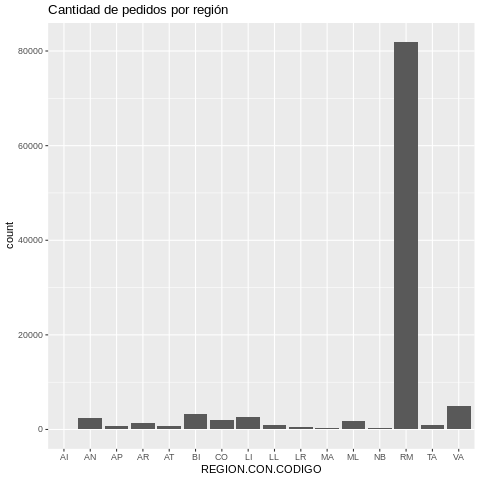

In [ ]:
%%R
ggplot(pedidos, aes(x = REGION.CON.CODIGO),) +
   ggtitle("Cantidad de pedidos por región") +
  geom_bar()

5. **Cantidad de pedidos dividos por comuna**

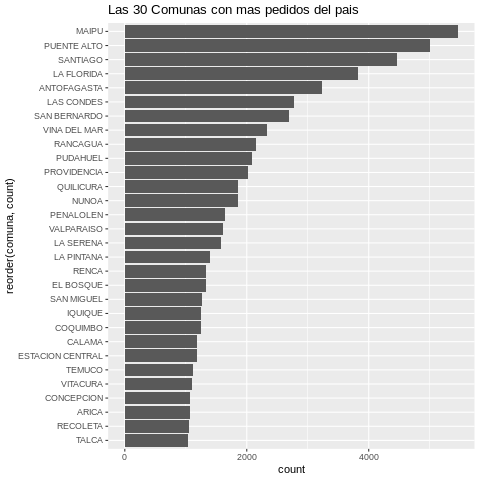

In [ ]:
%%R
freq_comuna <- data.frame(comuna = pedidos$Comuna, count = pedidos$count)
freq_comuna <-  unique(freq_comuna)
freq_comuna <- freq_comuna[order(freq_comuna[,"count"], decreasing = TRUE),]
ggplot(freq_comuna[1:30,], aes(x = reorder(comuna , count),y = count)) + ggtitle("Las 30 Comunas con mas pedidos del pais") + coord_flip() + geom_bar(stat = "identity")

6. Puente alto y Las condes son de las comunas más pobladas de la RM
Puente alto es una de las comunas más "zapatilleras" vs "Las condes" que es una comuna que tiende más a la ropa formal. A continuación veremos la cantidad de pedidos, el promedio de estos y la suma total de dinero de las respectivas comunas:

In [ ]:
%%R
pedidos_comuna_Lascondes <- data.frame(pedidos[pedidos$Comuna == "LAS CONDES", ] )
print(nrow(pedidos_comuna_Lascondes))
print(mean(pedidos_comuna_Lascondes$Precio.Pedido))
print(sum(pedidos_comuna_Lascondes$Precio.Pedido))

pedidos_comuna_maipu <- data.frame(pedidos[pedidos$Comuna == "MAIPU", ] )
print(nrow(pedidos_comuna_maipu))
print(mean(pedidos_comuna_maipu$Precio.Pedido))
print(sum(pedidos_comuna_maipu$Precio.Pedido))

[1] 2777
[1] 47841.46
[1] 132855726
[1] 5462
[1] 42816.93
[1] 233866080


7. **Se deja un historial de pedidos desde el inicio del dataset hasta la ultima fecha presente:**

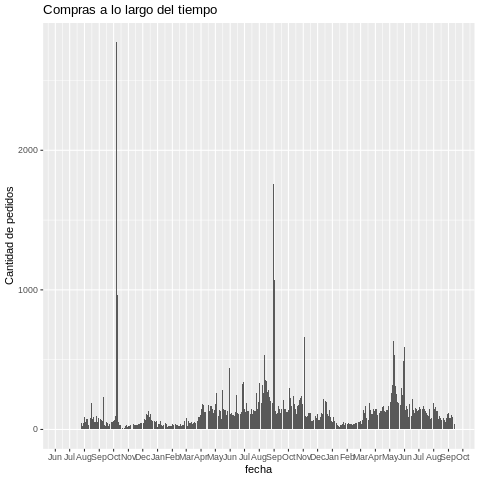

In [ ]:
%%R
ggplot(pedidos, aes(x = Fecha.Compra) ) + geom_bar() + scale_x_date(date_breaks = "1 month", date_labels = "%b") + labs(title = "Compras a lo largo del tiempo", x = "fecha", y = "Cantidad de pedidos")

8. **Vamos a ver cuanto se ha vendido en block por marca**

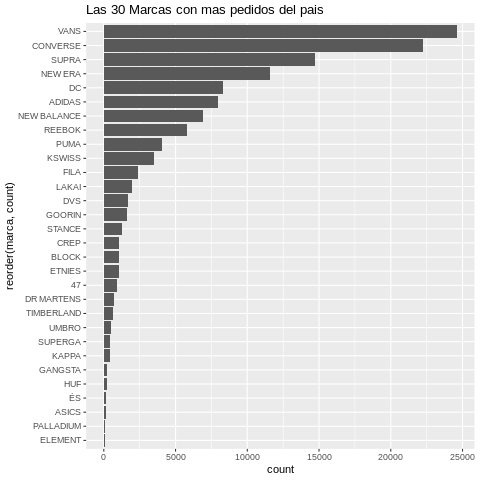

In [ ]:
%%R
freq_marca <- data.frame(marca = pedidos_detalle$Marca, count = pedidos_detalle$count.marca)
freq_marca <-  unique(freq_marca)
freq_marca <- freq_marca[order(freq_marca[,"count"], decreasing = TRUE),]

ggplot(freq_marca[1:30,], aes(x = reorder(marca , count), y = count)) + ggtitle("Las 30 Marcas con mas pedidos del pais") + coord_flip() + geom_bar(stat = "identity")

9. **Veremos cuanto se ha vendido en block por marca:**

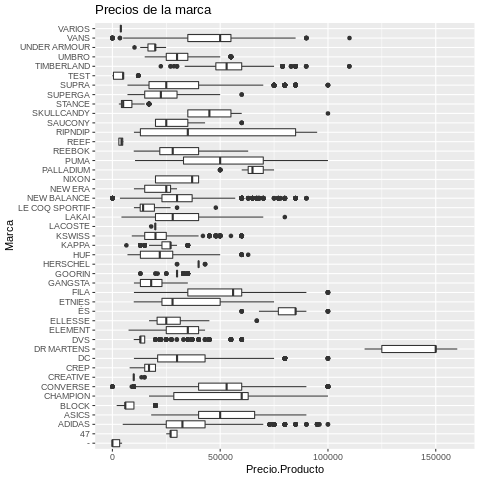

In [ ]:
%%R
precio_marca <- data.frame(marca = pedidos_detalle$Marca, precio = pedidos_detalle$Precio.Producto)

p1 <- ggplot(pedidos_detalle, aes(x = Marca, y = Precio.Producto)) + geom_boxplot()+ coord_flip() + ggtitle("Precios de la marca")
p1

# Hito 3

Para este hito se trabajará con la librería *pandas* en *Python*, por lo que se debe reimportar las bases de datos y también limpiarlas para reordenar las ideas que serán llevadas a cabo en este *Hito 2*.

Se importan las librerías necesarias para la exploración:

In [2]:
# Librerias principales para la exploración:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Cherry\anaconda3\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


Luego de esto, borramos las columnas de la dirección y el rut para proteger la privacidad de cada uno de los compradores, además que tenemos un ID de cliente que identifica a cada persona única, similar al *RUT*.

In [8]:
# Reimportamos todo
pedidos2 = pd.read_csv("Orders_OFICIAL.csv", sep=";")
details2 = pd.read_csv("ORDER_DETAIL_OFICIAL.csv", sep=";")

pedidos2 = pedidos2.drop(columns="Direccion 1")
pedidos2 = pedidos2.drop(columns="Direccion 2")
pedidos2 = pedidos2.drop(columns="RUT")
pedidos2 = pedidos2.drop(columns="Email")
pedidos2.head()

,ID,Precio Pedido,Numero Pedido,ID Cliente,Fecha Compra,Año Compra,Mes Compra,Cantidad Pedidos Cliente,Total Gastado Cliente,Comuna,Nombre Cliente,REGION CON CODIGO,Tipo despacho
0,"1,15E+12",21900,#1010,1.899446e+12,08-07-2019,2019,7,13.0,444337.0,COLINA,DENNISSE ALVARADO CHIGUAY,RM,Despacho
1,"1,15E+12",37419,#1011,1.938644e+12,25-07-2019,2019,7,1.0,37419.0,307,Florencia Garcia,RM,Despacho
2,"1,15E+12",40419,#1012,1.938654e+12,25-07-2019,2019,7,1.0,40419.0,301,Belén Herrera,RM,Despacho
3,"1,15E+12",12329,#1013,1.939397e+12,25-07-2019,2019,7,1.0,12329.0,316,Jason Lizana,RM,Despacho
4,"1,15E+12",20993,#1014,1.906865e+12,10-07-2019,2019,7,14.0,656793.0,LO BARNECHEA,Tomas Schnapp,RM,Retiro en tienda


También cargaremos los datos en R para trabajar con las reglas de asociación

In [ ]:
%%R
install.packages('arules')
install.packages('arulesViz')

# ¿Cómo se relaciona el precio de la compra con el lugar desde donde se pidió?
Esta era una pregunta planteada en el hito 1, la cual se pudo responder explorando datos

Promedio Chonchi:  70290 Cantidad de pedidos: 7
Promedio Santiago: 41776 Cantidad de pedidos: 4459
Promedio Vitacura: 45062 Cantidad de pedidos: 1102
Promedio Iquique:  49105 Cantidad de pedidos: 1249




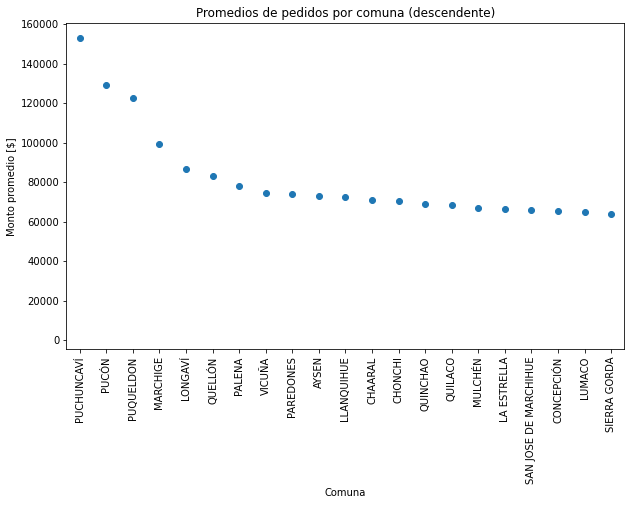

In [36]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Comunas

comunas = pedidos2['Comuna'].unique()
# print(comunas) -> Algunas son numeros

promedios = []
for comuna in comunas:
  promedios.append(pedidos2[pedidos2['Comuna'] == comuna]['Precio Pedido'].mean())



# Promedio de precios de pedido por comuna
print("Promedio Chonchi: ",round(pedidos2[pedidos2['Comuna'] == 'CHONCHI']['Precio Pedido'].mean()),"Cantidad de pedidos:", len(pedidos2[pedidos2['Comuna'] == 'CHONCHI']['Precio Pedido']))
print("Promedio Santiago:",round(pedidos2[pedidos2['Comuna'] == 'SANTIAGO']['Precio Pedido'].mean()),"Cantidad de pedidos:", len(pedidos2[pedidos2['Comuna'] == 'SANTIAGO']['Precio Pedido']))
print("Promedio Vitacura:",round(pedidos2[pedidos2['Comuna'] == 'VITACURA']['Precio Pedido'].mean()),"Cantidad de pedidos:", len(pedidos2[pedidos2['Comuna'] == 'VITACURA']['Precio Pedido']))
print("Promedio Iquique: ",round(pedidos2[pedidos2['Comuna'] == 'IQUIQUE']['Precio Pedido'].mean()),"Cantidad de pedidos:", len(pedidos2[pedidos2['Comuna'] == 'IQUIQUE']['Precio Pedido']))

print("\n")

zip_iterator = zip(comunas, promedios)
diccionario = list(zip_iterator)
diccionario = sorted(diccionario, key=lambda cantidad:cantidad[1], reverse=True)

comunas_final = []
prom_final = []
for elem in diccionario:
  if not elem[0].isnumeric():
    comunas_final.append(elem[0])
    prom_final.append(elem[1])

#print(comunas_final)
plt.figure(figsize=(10,6))
plt.scatter(comunas_final, prom_final)
plt.xlim(-0.5, 20.5)
plt.xticks(rotation=90)
plt.title("Promedios de pedidos por comuna (descendente)")
plt.xlabel("Comuna")
plt.ylabel("Monto promedio [$]")
plt.show()



# Preguntas y problemas

Dada la exploración anterior y su motivación original, formular preguntas que se pueden responder mediante la minería de datos y que se puedan vincular a la problemática planteada en la motivación


1. **¿Qué marcas se compran juntas? (En un mismo pedido)**
2. **¿Existe una tendencia, segun las caracteristicas del comprador, en la segunda compra con respecto a la primera?**
3. **¿Qué tipo de producto puede que compre alguien que ya adquirió x tipo de producto?** 
4. **Comportamiento de clientes con respecto a la cantidad de compras y su monto total.** 






# Pregunta 1
Para responder a esta pregunta se realizarán los siguientes pasos:
- Utilizaremos Reglas de Asociación, basándose en el problema de la canasta.
- No se ha visto en clases, por lo que no tenemos definido los pasos a seguir.

# Pregunta 2 
Para responder a esta pregunta se realizarán los siguientes pasos usando clasificación:

-Primero se filtrará la información de la tabla, se rescatarán las características más relevantes: comuna, mes de compra, marca y total gastado cliente. 

- Luego se procederá a separar el dataset en 2 conjuntos: Training y testing  para entretar los clasificadores. Le ocultaremos los productos de la 2da compra.Utilizaremos el Decision Tree y el Support Vector Machine. 

- Finalmente una vez entrenado los datos se utilizarán parámetros de accuracy, Recall, precision y f1 para determinar qué tan bueno fue el desempeño del clasificador y ver si pudo efectivamente predecir la pregunta en cuestión.

# Pregunta 3
- De forma análoga a la pregunta 1 Utilizaremos Reglas de Asociación, basándose en el problema de la canasta.

- Generar una nueva columna  con el tipo de producto (por ejemplo: polera, zapatillas, jockey, entre otros). Para lograrlo, se extraerá la primera palabra del nombre del producto desde la tabla *order_detail* (por ejemplo: "Zapatilla Adidas 3Mc Mujer - BURDEO / 7.5" corresponde a una zapatilla).

- No se ha visto en clases, por lo que no tenemos definido los pasos a seguir.


# Problema 4

Para responder a esta pregunta se utilizarán herramientas de clustering y se  seguirán los siguientes pasos:
- Crear una tabla que por cada cliente, tenga su cantidad de pedidos totales hechos en la página y cuanto fue el gasto entre todos esos pedidos.

*K-means:*
- Debemos definir el número de clusters que queremos generar.Esto lo hacemos implementando el método del codo.
- Luego se implementaran K-mean segun la cantidad de clusters predicha anteriormente.

*DBSCAN:*
- Se debe estimar el valor óptimo de *eps* usando el método de la rodilla (basado en KNN).
- Luego se ejecuta y grafica los clusters usando el método DBSCAN haciendo uso de parámetro *eps(y)* encontrado previamente.

Finalmente usaremos el coeficiente de Silhouette para evaluar los clusters.




## Pregunta 1

In [6]:
from mlxtend.frequent_patterns import apriori

details = pd.read_csv("ORDER_DETAIL_OFICIAL2.csv", sep=";")
details.head(3)

,id,Numero Pedido,Fecha Pedido,Nombre Producto,SKU,Cantidad,Precio Producto,Precio Total Productos,Marca,Tipo Producto
0,"1,12E+12",#1002,04-07-2019,Beanie Adidas Trefoil Accesorios - No Color / ...,DV2486-OSFM,1,17990,17990,ADIDAS,Beanie
1,"1,12E+12",#1003,04-07-2019,Jockey Dc Cap Star 2 Hombre - Verde / L-XL,55300096GRA0-LXL,2,17990,35980,DC,Jockey
2,"1,12E+12",#1003,04-07-2019,Zapatilla Adidas 3Mc Hombre - BURDEO / 8,DB3092-080,1,34990,34990,ADIDAS,Zapatilla


In [47]:
# 
details2 = details.copy()

for i in details2.index:
    cantidad = details2["Cantidad"][i]
    if cantidad!=1:
        for n in range(cantidad-1):
            details2=details2.append({"id" : details2["id"][i],
                                    "Numero Pedido" : details2["Numero Pedido"][i],
                                    "Fecha Pedido" : details2["Fecha Pedido"][i],
                                    "Nombre Producto" : details2["Nombre Producto"][i],
                                    "SKU" : details2["SKU"][i],
                                    "Cantidad" : 1,
                                    "Precio Producto" : details2["Precio Producto"][i],
                                    "Precio Total Productos" : details2["Precio Total Productos"][i],
                                    "Marca" : details2["Marca"][i],
                                    "Tipo Producto" : details2["Tipo Producto"][i]}, ignore_index=True)  

details2=details2.drop(columns="Cantidad")

In [12]:
# Creamos las canastas
canastas = pd.read_csv("canastas.csv")
canastas.head()

,Beanie
0,"Jockey;""Zapatilla"";""Jockey"""
1,Zapatilla
2,Zapatilla
3,"Zapatilla;""Zapatilla"";""Zapatilla"""
4,Zapatilla


In [1]:
# Activate R magic:
%load_ext rpy2.ipython

C:\Users\Cherry\anaconda3\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [2]:
%%R
library('arules')  # cargamos arules

R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: 'arules'


R[write to console]: The following objects are masked from 'package:base':

    abbreviate, write




In [6]:
%%R
canastas <- read.transactions("canastas.csv", sep=";")

In [23]:
%%R
frequentItems <- eclat(canastas, parameter = list(supp = 0.000001, maxlen = 10))

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE   1e-06      1     10 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 0 

create itemset ... 
set transactions ...[65 item(s), 104962 transaction(s)] done [0.01s].
sorting and recoding items ... [65 item(s)] done [0.00s].
creating sparse bit matrix ... [65 row(s), 104962 column(s)] done [0.01s].
writing  ... [1393 set(s)] done [0.01s].
Creating S4 object  ... done [0.00s].


In [29]:
%%R
items.sorted <- sort(frequentItems, by="support")
# inspect(items.sorted[0:10])

     items                   support    count
[1]  {Zapatilla VANS}        0.21689754 22766
[2]  {Zapatilla CONVERSE}    0.19940550 20930
[3]  {Zapatilla SUPRA}       0.11890017 12480
[4]  {Jockey}                0.09339571  9803
[5]  {Zapatilla DC}          0.07225472  7584
[6]  {Zapatilla ADIDAS}      0.06900593  7243
[7]  {Zapatilla NEW BALANCE} 0.06013605  6312
[8]  {Zapatilla REEBOK}      0.05056116  5307
[9]  {Zapatilla PUMA}        0.03681332  3864
[10] {Beanie}                0.02898192  3042


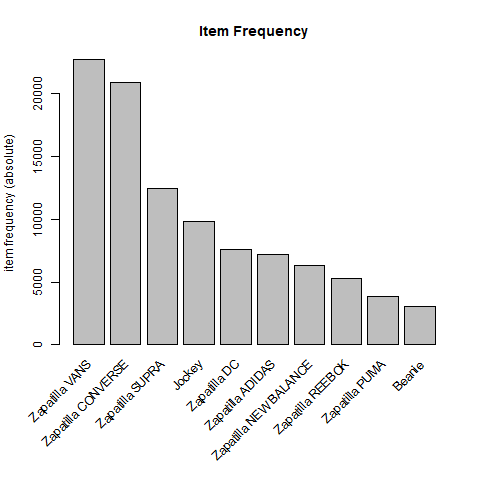

In [30]:
%%R
itemFrequencyPlot(canastas, topN=10, type="absolute", main="Item Frequency")

In [ ]:
%%R
rules <- apriori(canastas, parameter=list(support=0.00001, confidence=0.3))

In [35]:
%%R
rules.sorted <- sort(rules, by="lift")
rules.sorted.first3 <- head(rules.sorted, 3)
inspect(rules.sorted.first3)

    lhs                 rhs        support     confidence coverage     lift    
[1]

From cffi callback <function _consolewrite_ex at 0x000002548AD51D30>:
Traceback (most recent call last):
  File "C:\Users\Cherry\anaconda3\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 132, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
  File "C:\Users\Cherry\anaconda3\lib\site-packages\rpy2\rinterface_lib\conversion.py", line 133, in _cchar_to_str_with_maxlen
    s = ffi.string(c, maxlen).decode(encoding)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 4: invalid continuation byte


 => {Converse} 6.66908e-05 0.8750000  7.621806e-05 7653.479
[2] {Converse}       =>

From cffi callback <function _consolewrite_ex at 0x000002548AD51D30>:
Traceback (most recent call last):
  File "C:\Users\Cherry\anaconda3\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 132, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
  File "C:\Users\Cherry\anaconda3\lib\site-packages\rpy2\rinterface_lib\conversion.py", line 133, in _cchar_to_str_with_maxlen
    s = ffi.string(c, maxlen).decode(encoding)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 4: invalid continuation byte


 6.66908e-05 0.5833333  1.143271e-04 7653.479
[3]

From cffi callback <function _consolewrite_ex at 0x000002548AD51D30>:
Traceback (most recent call last):
  File "C:\Users\Cherry\anaconda3\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 132, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
  File "C:\Users\Cherry\anaconda3\lib\site-packages\rpy2\rinterface_lib\conversion.py", line 133, in _cchar_to_str_with_maxlen
    s = ffi.string(c, maxlen).decode(encoding)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 4: invalid continuation byte


 => {Converse} 6.66908e-05 0.8750000  7.621806e-05 7653.479
    count
[1] 7    
[2] 7    
[3] 7    


## Pregunta 4

In [ ]:
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

Se crea una tabla con lo cantidad de pedidos y lo total gastado por cada cliente.

In [ ]:
# crear tabla a partir de la otra
pedidos3 = pedidos2[['ID Cliente', 'Cantidad Pedidos Cliente', 'Total Gastado Cliente']].copy()
print("Numero de filas con clientes repetidos:",pedidos3.size)
pedidos3 = pedidos3.drop_duplicates(subset = ['ID Cliente'])
print("Numero de filas luego de quitar clientes repetidos:",pedidos3.size)
pedidos3 = pedidos3.drop(['ID Cliente'], axis=1)
pedidos3.head()

Numero de filas con clientes repetidos: 314760
Numero de filas luego de quitar clientes repetidos: 256215


,Cantidad Pedidos Cliente,Total Gastado Cliente
0,13.0,444337.0
1,1.0,37419.0
2,1.0,40419.0
3,1.0,12329.0
4,14.0,656793.0


Se crea un dataframe con el cual se trabajará en los clusters.

In [ ]:
X = pd.DataFrame(pedidos3).to_numpy()
X

array([[1.30000e+01, 4.44337e+05],
       [1.00000e+00, 3.74190e+04],
       [1.00000e+00, 4.04190e+04],
       ...,
       [1.00000e+00, 5.49800e+04],
       [1.00000e+00, 5.39800e+04],
       [1.00000e+00, 5.99800e+04]])

**K-means:**

Se utiliza el metodo del codo entre 1 y 10 clusters para definir la cantidad de clusters que se utilizarán luego.

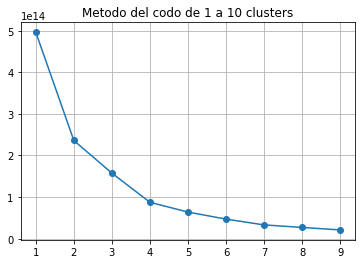

In [ ]:
sse = []

clusters = list(range(1, 10))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(X)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 10 clusters")
plt.grid(True)
plt.show()

Se grafican los clusters.

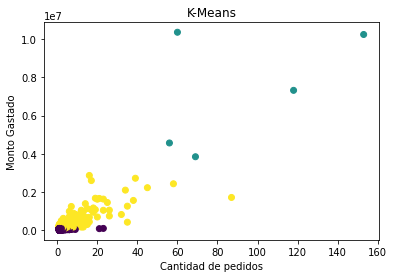

In [ ]:
kmeans3 = KMeans(n_clusters=3, random_state=100).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans3.labels_)
plt.title("K-Means")
plt.ylabel("Monto Gastado")
plt.xlabel("Cantidad de pedidos")
plt.show()

**DBSCAN:**

Se utiliza el metodo de la rodilla para estimar el valor optimo del eps. Como no se encuentra un punto de infleccion claro, se eligen algunos valores donde la curva sube.

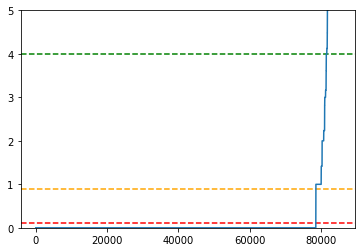

In [ ]:
nbrs = NearestNeighbors(n_neighbors=3).fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.axhline(y=0.1, color='r', linestyle='--') #Ajuste el valor para "y" en esta línea
plt.axhline(y=0.9, color='orange', linestyle='--') #Ajuste el valor para "y" en esta línea
plt.axhline(y=4, color='g', linestyle='--') #Ajuste el valor para "y" en esta línea
plt.ylim(0, 5)
plt.plot(distances)

Se grafican los clusters con distintos valores de eps=0.1

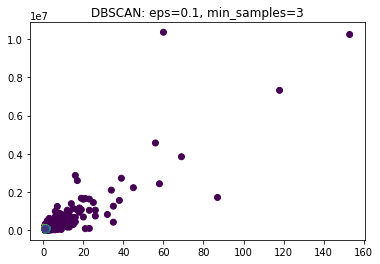

In [ ]:
eps = 0.1
min_samples = 3

dbscan01 = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
plt.scatter(X[:,0], X[:,1], c=dbscan01.labels_)
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
#plt.ylim(0, 10000)
plt.show()

Se grafican los clusters con distintos valores de eps=0.9

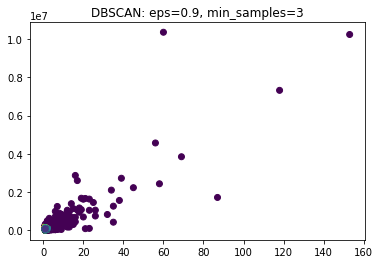

In [ ]:
eps = 0.9
min_samples = 3

dbscan09 = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
plt.scatter(X[:,0], X[:,1], c=dbscan09.labels_)
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
plt.show()

Se grafican los clusters con distintos valores de eps=4

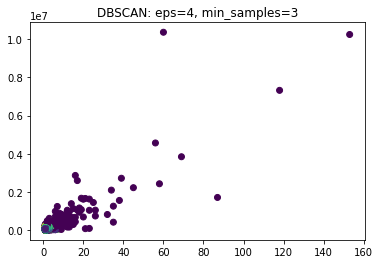

In [ ]:
eps = 4
min_samples = 3

dbscan4 = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
plt.scatter(X[:,0], X[:,1], c=dbscan4.labels_)
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
plt.show()

Finalmente se evalúan los clusters hechos utilizando el coeficiente de Silhouette.

In [ ]:
print("Dataset X K-Means 3\t", silhouette_score(X, kmeans3.labels_))

# para DBSCAN tenermos que filtrar las labels negativas, ya que representan ruido, no otro cluster
_filter_label = dbscan01.labels_ >= 0
print("Dataset X DBSCAN 0.1 \t", silhouette_score(X[_filter_label], dbscan01.labels_[_filter_label]))

_filter_label = dbscan09.labels_ >= 0
print("Dataset X DBSCAN 0.9 \t", silhouette_score(X[_filter_label], dbscan09.labels_[_filter_label]))

_filter_label = dbscan4.labels_ >= 0
print("Dataset X DBSCAN 4 \t", silhouette_score(X[_filter_label], dbscan4.labels_[_filter_label]))


Dataset X K-Means 3	 0.7373938413072239
Dataset X DBSCAN 0.1 	 1.0
Dataset X DBSCAN 0.9 	 1.0
Dataset X DBSCAN 4 	 0.9288472444735113


Dado los coeficientes obtenidos tenemos que ver el coef. Silhouette ~ 1. Por lo tanto, los que tienen mejor resultado dentro de los 4 experimentos son el DBSCAN con *eps=0.1* y *eps=0.9* debido a que su valor es  1.

# Contribuciones

**María Hernández:** Encargada de encontrar el dataset, mejorar introduccion, resultados preliminares. 

**Lung Pang:** Encargado de hacer el repositorio de GitHub y gráficos, reajuste de preguntas, resultados preliminares. 

**Cristóbal Saldías** Encargado del informe y su organización, anonimizar los datos, resultados preliminares. 

**Víctor Vidal** Encargado de hacer la presentación, mejoró exploración de datos, resultados preliminares. 